In [ ]:
# 1.确定要探索的问题：
#     泰坦尼克号上的生还率和各因素（客舱等级、年龄、性别、上船港口等）的关系
# 2.导入数据与观察
#     导包
#     读取csv文件
#     预览，查看数据与了解各字段含义
#     查看是否有缺失值
#     得出结论：各字段的含义以及哪几列有缺失值及缺失率
        
# 3.数据清洗
#     1.填补age(连续型)缺失值，一般采用均值或中位数填补，此次按船舱等级和性别分组后，计算中位数填充
#     2.填补Embarked（离散型）缺失值，一般采用众数填充
    
# 4.数据可视化
#     1.基本情况分析：891人中生还率和未生还率各是多少
#         画出生还柱状图
#         生还比率饼图
#     2.分别探索下 Pclass、Sex、Age 和 Embarked 等与“生还率”的关系.
#         单因素分析
#             舱位（离散型）
#             性别 （离散型）
#             年龄（连续型，需要先分箱cut成几组分别查看）
#             登船港口（离散型）
#         多因素分析
            


# 泰坦尼克号上的生还率和各因素（客舱等级、年龄、性别、上船港口等）的关系

# 1.导入数据及观察

In [283]:
# 基本信息
import numpy as np
import pandas as pd


# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.show()



# # 可视化中文字体显示设置
# plt.rc('font', family='SimHei', size=13)
# # 可视化负号显示设置
# plt.rc('axes', unicode_minus=False)

In [2]:
data_path=r"C:\Users\little_nono\Downloads\train.csv"

In [230]:
df=pd.read_csv(data_path)

In [231]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [233]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [234]:
df.isnull().sum()/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## 结论
### 原始数据字段含义说明：
- PassengerId：乘客编号
- Survived：是否幸存 0 = 遇难，1 = 幸存
- Pclass：船舱等级 1 = 头等舱，2 = 二等舱，3 = 三等舱
- Name：乘客姓名
- Sex：性别
- Age：年龄
- SibSp：登船的兄弟姐妹或配偶个数
- Parch：登船的父母或小孩个数
- Ticket：船票号码
- Fare：船票价格
- Cabin：船舱号
- Embarked：登船港口

### 有缺失值的列及缺失率：
#### 名称     中文名称 缺失数量 缺失率
- Age       性别    177    20%
- Cabin     船舱号   687    77%
- Embarked   登船港口  2     0.2%

- 其中Cabin缺失率太高，在此次分析中没有意义

# 2.数据清洗

In [235]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [236]:
df['Age'].median()

28.0

In [237]:
age_median=df.groupby(['Pclass','Sex'])['Age'].median()

In [238]:
age_median

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [239]:
# 设置索引
df.set_index(['Pclass','Sex'],inplace=True)

In [240]:
df['Age'].fillna(age_median,inplace=True)

In [241]:
df.head()

,,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,Sex,,,,,,,,,,
3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [242]:
# 取消索引
df.reset_index(inplace=True)

In [243]:
df['Age'].describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [244]:
df.head()

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [245]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [246]:
df['Embarked'].fillna('S',inplace=True)

In [247]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [248]:
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    object 
 2   PassengerId  891 non-null    int64  
 3   Survived     891 non-null    int64  
 4   Name         891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3.数据可视化

## 1）891人中生还率和未生还率各是多少？

In [78]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [81]:
total_no_survived,total_survived=df['Survived'].value_counts()[0],df['Survived'].value_counts()[1]
total_no_survived,total_survived

(549, 342)

In [104]:
survived_map={0:'no-survived',1:'survived'}
df['Survived_cn']=df['Survived'].map(survived_map)

In [110]:
df.head()

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cn
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,no-survived
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,survived
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,survived
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,survived
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,no-survived


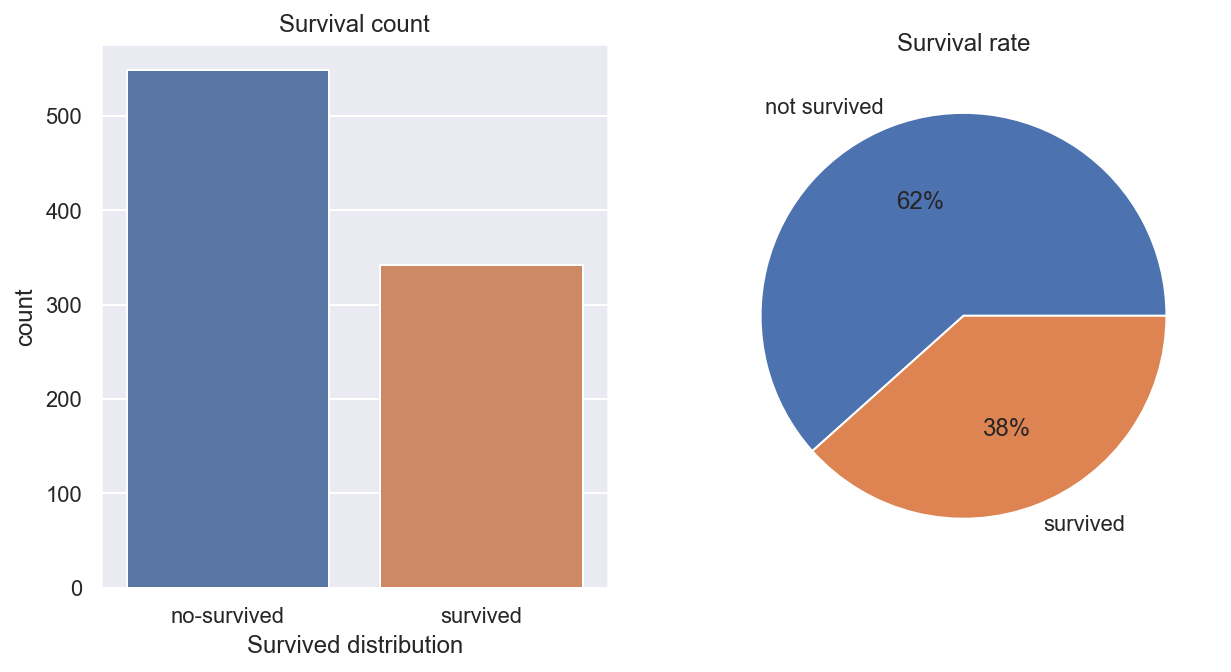

In [112]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Survived_cn',data=df)
plt.title('Survival count')
plt.xlabel('Survived distribution')
plt.subplot(122)
plt.pie([total_no_survived,total_survived],labels=['not survived','survived'],autopct='%1.0f%%')
plt.title('Survival rate')
plt.show()

#### 结论：891名乘客中，生还率和未生还率分别为38%和62%

## 2）分别探索 Pclass、Sex、Age 和 Embarked 等与“生还率”的关系.

### Pclass 船舱等级

In [137]:
pd.pivot_table(df,index='Pclass',values='Name',aggfunc='count')

,Name
Pclass,
1,216
2,184
3,491


In [130]:
df[['Pclass','Name']].groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

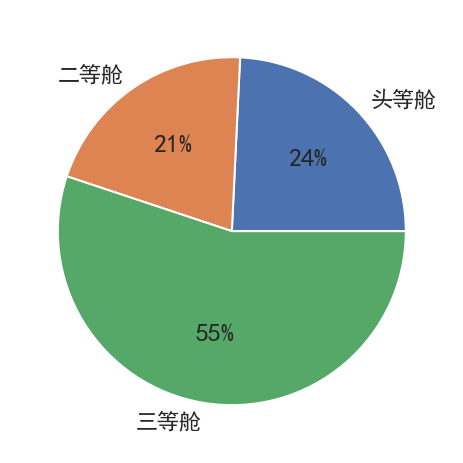

In [135]:
plt.pie(df[['Pclass','Name']].groupby(['Pclass']).size(),\
        labels=['头等舱','二等舱','三等舱'],autopct='%1.0f%%')
plt.show()

In [387]:
# fig = plt.figure()
# fig.set(alpha=0.2)
# Survived_0 = df.Pclass[df.Survived == 0].value_counts()
# Survived_1 = df.Pclass[df.Survived == 1].value_counts()
# df1=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
# df1.plot(kind='bar', stacked=True)
# plt.xticks(rotation=360)
# plt.title(u"各船舱等级的获救情况")
# plt.xlabel(u"船舱等级") 
# plt.ylabel(u"人数") 
# plt.show()

In [276]:
pd.pivot_table(df,index='Pclass',values='Survived',aggfunc='mean')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


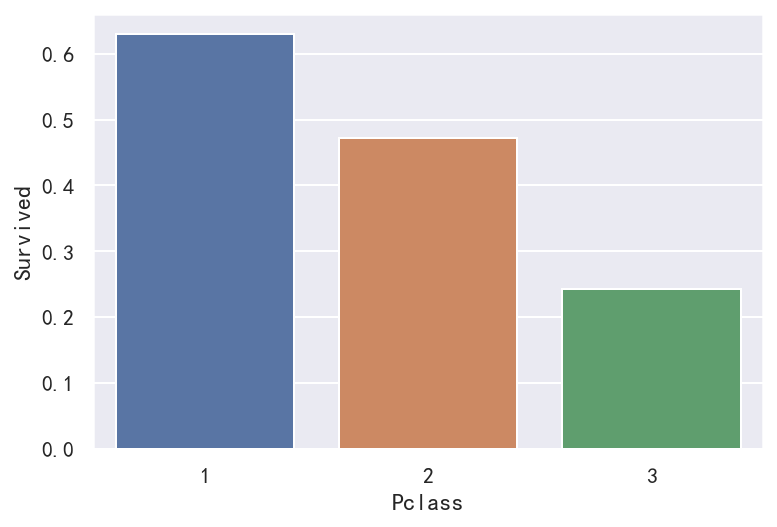

In [275]:
sns.barplot(data=df,x='Pclass',y='Survived',ci=None)
plt.show()

#### 结论： 头等舱的生还率大，其次是二等舱，三等舱的生还率最小

### Sex 性别

In [388]:
# Survived_0 = df.Sex[df.Survived == 0].value_counts()
# Survived_1 = df.Sex[df.Survived == 1].value_counts()
# df1=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
# df1.plot(kind='bar', stacked=True)
# plt.xticks(rotation=360)
# plt.title(u"各性别的获救情况")
# plt.xlabel(u"性别") 
# plt.ylabel(u"人数") 
# plt.show()

In [277]:
pd.pivot_table(df,index='Sex',values='Survived',aggfunc='mean')

,Survived
Sex,
female,0.742038
male,0.188908


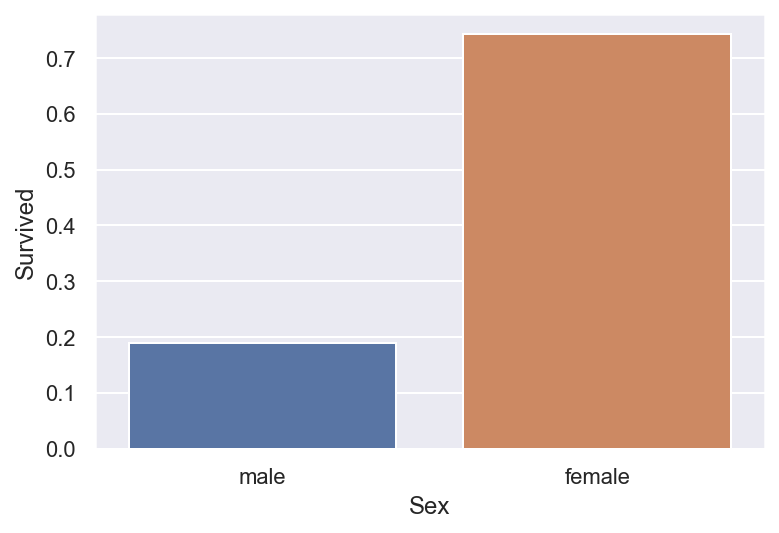

In [286]:

sns.barplot(data=df,x='Sex',y='Survived',ci=None)
plt.show()

#### 结论：女性的获救率远大于男性

### 不同舱位不同性别的生还率

In [279]:
pd.pivot_table(df,index=['Pclass','Sex'],values='Survived',aggfunc='mean')

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

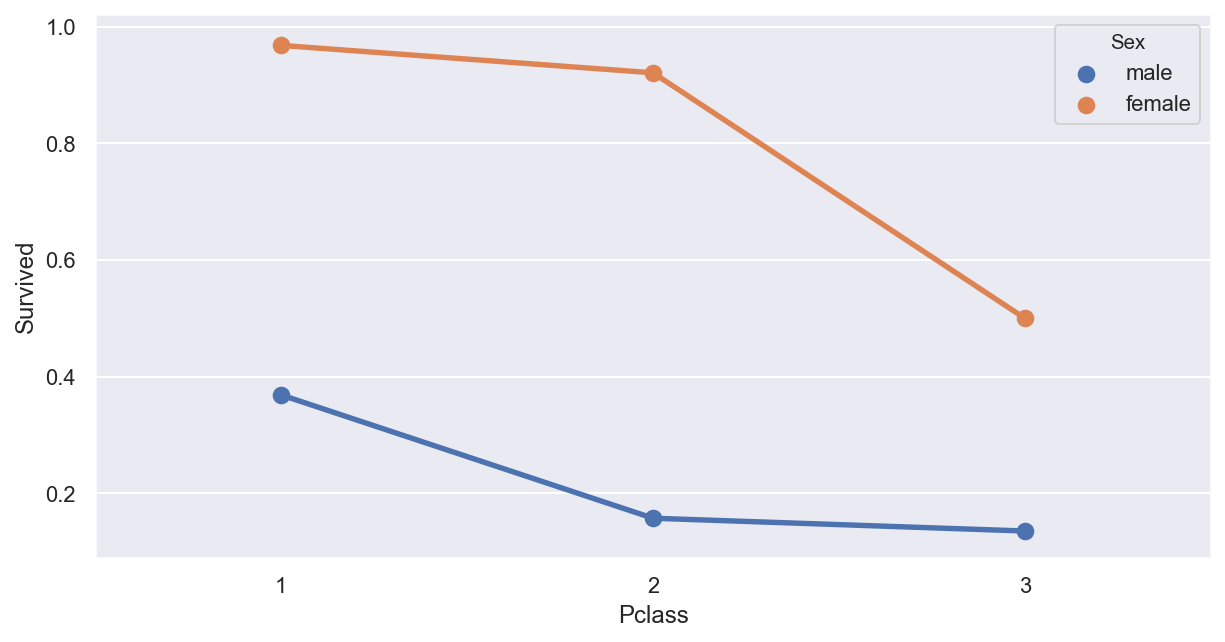

In [287]:
plt.figure(figsize=(10,5))
sns.pointplot(data=df,x='Pclass',y='Survived',hue='Sex',ci=None)
plt.show()

#### 结论：
- 1.各舱位中女性的生还率比男性要高
- 2.一二等舱中女性的生还率接近，且大于三等舱位
- 3.一等舱男性的生还率远大于二三等舱，二三等舱男性的生化率接近

### Age 年龄

In [292]:
# 连续型随机变量，先分组
df['AgeGroup']=pd.cut(df['Age'],5)
pd.value_counts(df['AgeGroup'])

(16.336, 32.252]    493
(32.252, 48.168]    218
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeGroup, dtype: int64

In [293]:
pd.pivot_table(df,index='AgeGroup',values='Survived',aggfunc='mean')

,Survived
AgeGroup,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.336714
"(32.252, 48.168]",0.412844
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


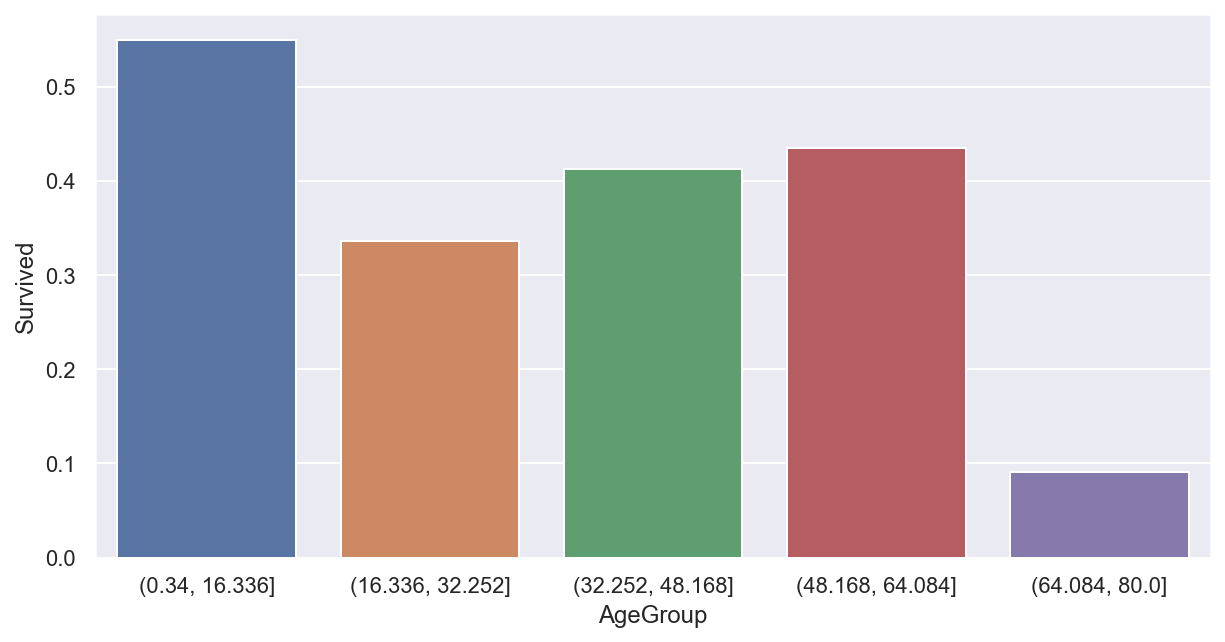

In [297]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['AgeGroup'],y=df['Survived'],ci=None)
plt.show()

#### 结论：儿童少年组生还率更高

### Embarked 登船港口

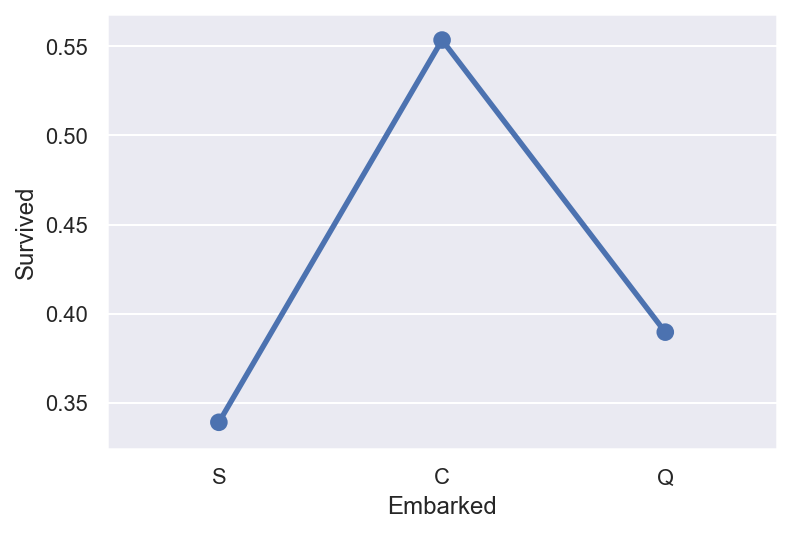

In [311]:
sns.pointplot('Embarked','Survived',data=df,ci=None)
plt.show()

#### 结论：C港口上船的生还率最高，其次是Q港口，S港口的生还率最低

## 多因素分析

### 年龄（age）、性别（Sex）与生还率的关系

In [313]:
pd.pivot_table(df,index='AgeGroup',columns='Sex',values='Survived')

Sex,female,male
AgeGroup,,
"(0.34, 16.336]",0.673469,0.431373
"(16.336, 32.252]",0.701220,0.155015
"(32.252, 48.168]",0.818182,0.191489
"(48.168, 64.084]",0.916667,0.177778
"(64.084, 80.0]",NaN,0.090909


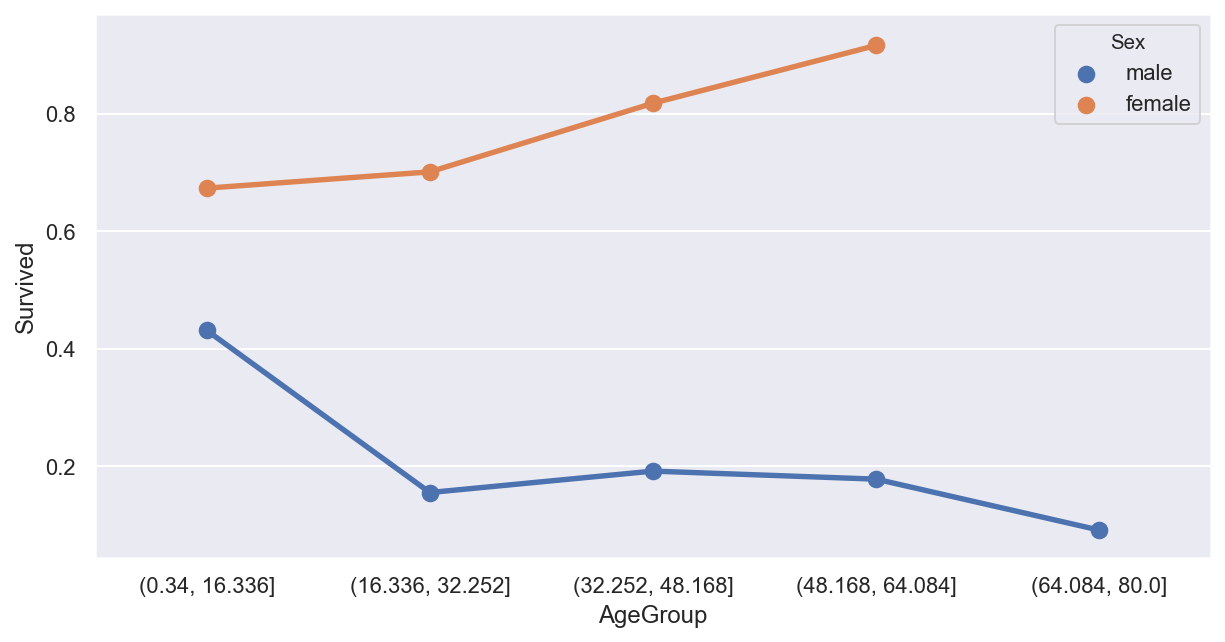

In [318]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df['AgeGroup'],y=df['Survived'],hue=df['Sex'],ci=None)
plt.show()

#### 结论：儿童少年、女性的生还率更高，男性生还的基本都是少年儿童

### 年龄（Age）、性别（Sex）、舱位（Pclass）与生还率的关系

In [342]:
pd.pivot_table(df,index='AgeGroup',columns=['Sex','Pclass'],values='Survived')

Sex                 female                          male                    
Pclass                   1         2         3         1         2         3
AgeGroup                                                                    
(0.34, 16.336]    0.833333  1.000000  0.545455  1.000000  0.818182  0.270270
(16.336, 32.252]  0.968750  0.921053  0.521277  0.444444  0.087719  0.138776
(32.252, 48.168]  1.000000  0.909091  0.250000  0.366667  0.074074  0.055556
(48.168, 64.084]  0.941176  0.833333  1.000000  0.269231  0.090909  0.000000
(64.084, 80.0]         NaN       NaN       NaN  0.166667  0.000000  0.000000

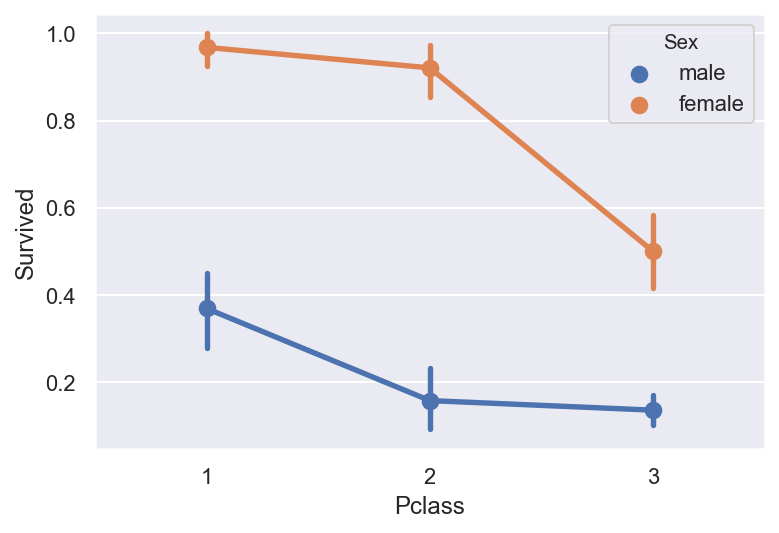

In [328]:
sns.pointplot('Pclass','Survived',data=df,hue='Sex')

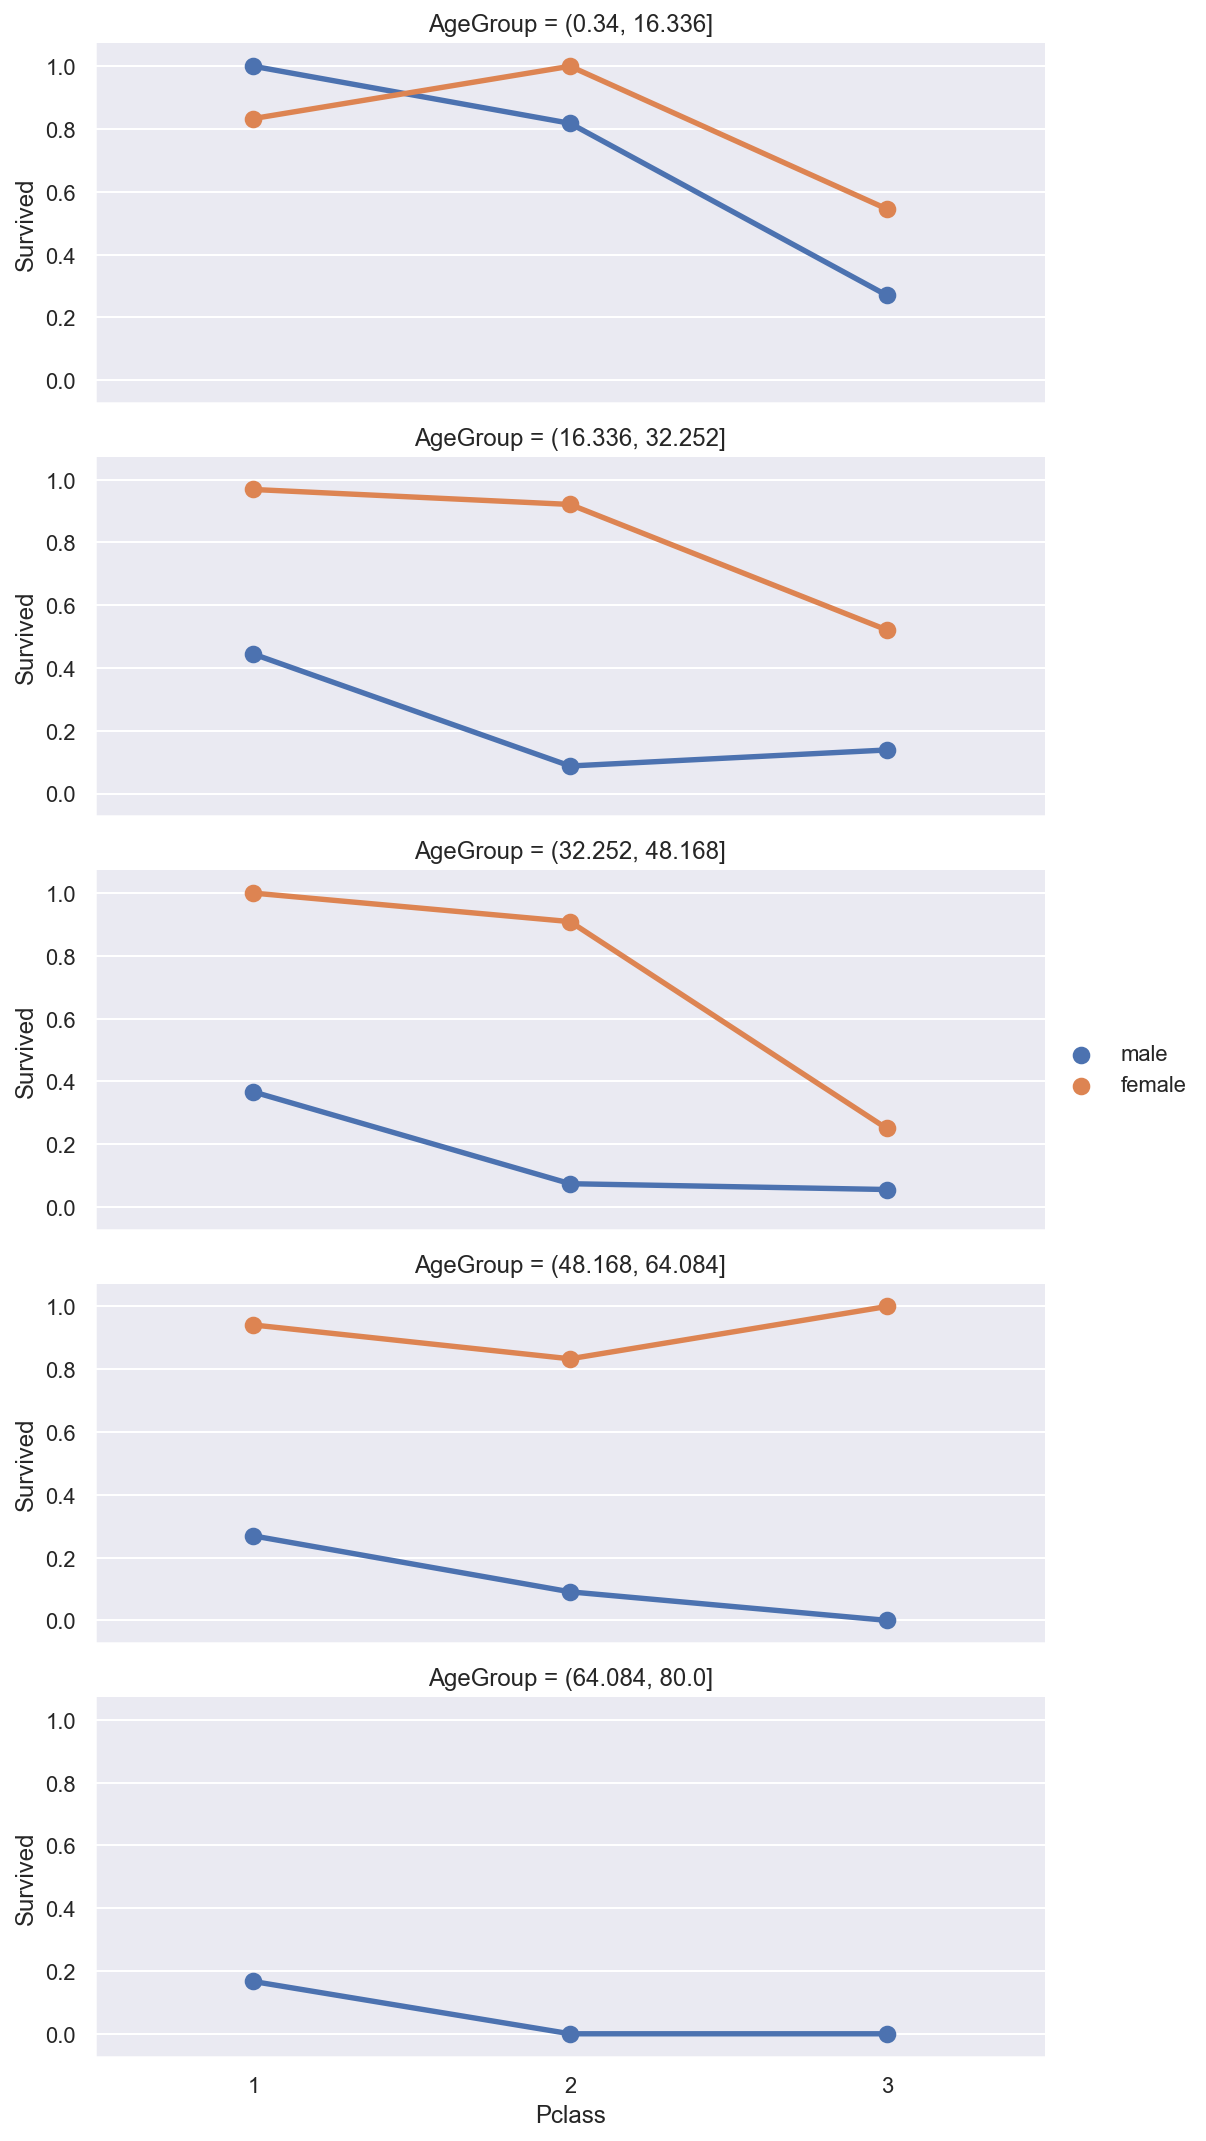

In [367]:
g=sns.FacetGrid(df,row='AgeGroup',aspect=2.5)
g=g.map(sns.pointplot,'Pclass','Survived','Sex',palette="deep",ci=None,order=[1,2,3],hue_order=["male","female"]).add_legend()

### 性别(Sex)、舱位(Pclass)、登船码头(Embarked)与生还率的关系

In [368]:
pd.pivot_table(df,index='Embarked',columns=['Sex','Pclass'],values='Survived')

Sex         female                          male                    
Pclass           1         2         3         1         2         3
Embarked                                                            
C         0.976744  1.000000  0.652174  0.404762  0.200000  0.232558
Q         1.000000  1.000000  0.727273  0.000000  0.000000  0.076923
S         0.960000  0.910448  0.375000  0.354430  0.154639  0.128302

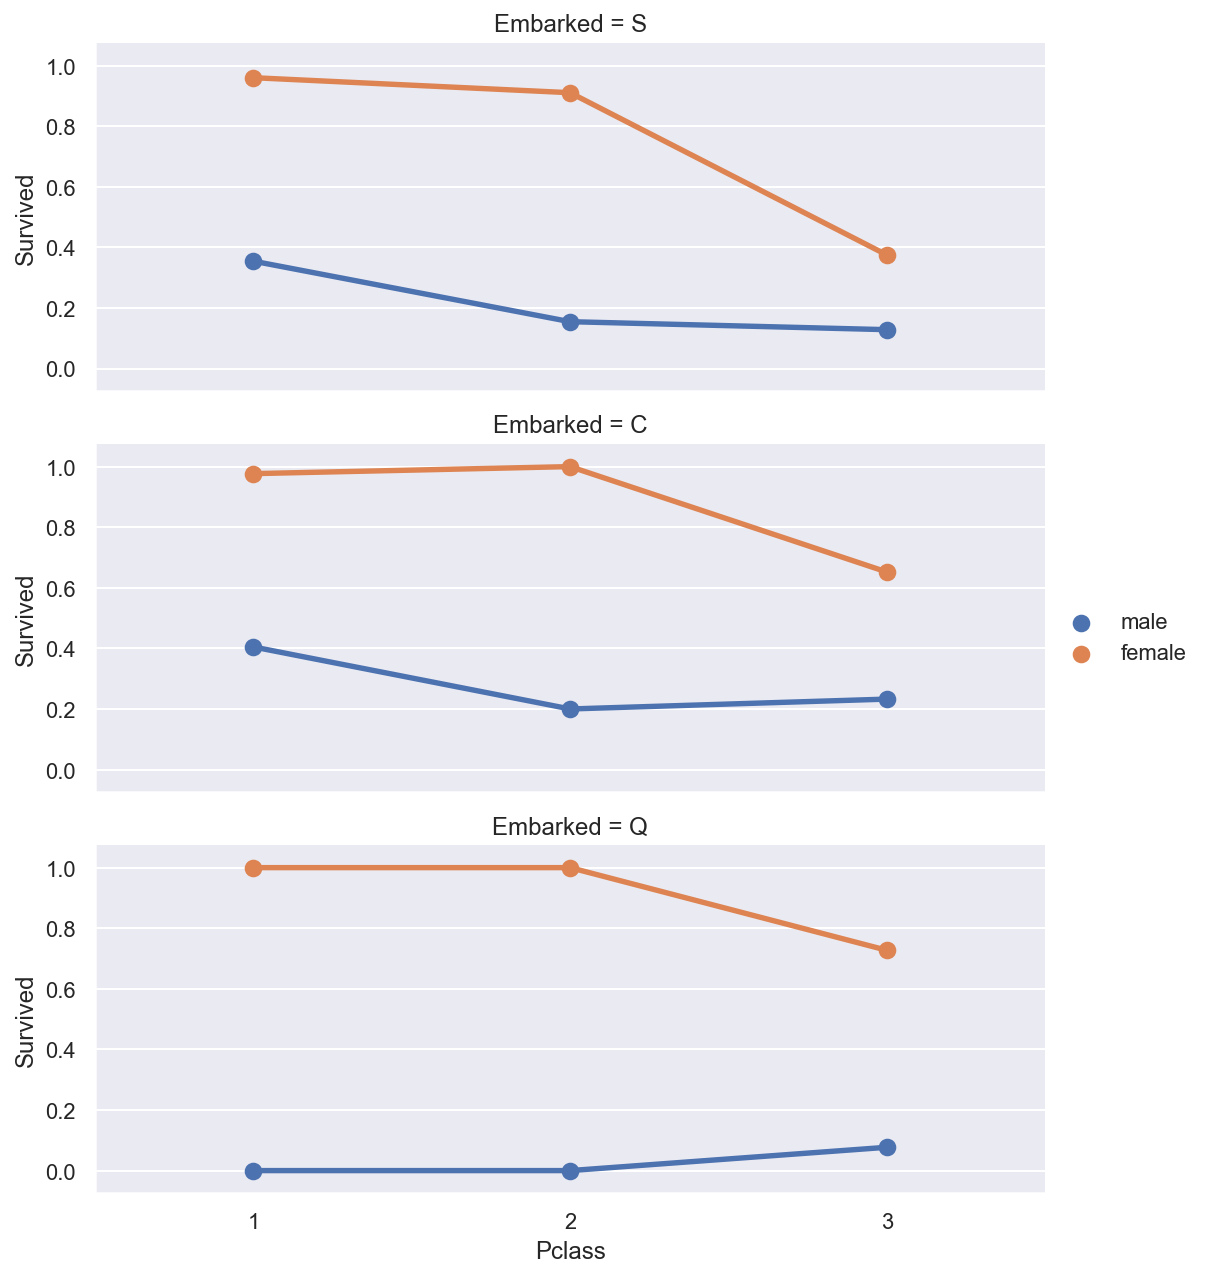

In [369]:
g=sns.FacetGrid(df,row='Embarked',aspect=2.5)
g=g.map(sns.pointplot,'Pclass','Survived','Sex',palette="deep",ci=None,order=[1,2,3],hue_order=["male","female"]).add_legend()

## 总结：
本次分析主要探寻泰坦尼克号上的生还率和各因素（客舱等级、年龄、性别、上船港口等）的关系。

样本容量为 891，生还 342 人，生还率为 38%。

泰坦尼克号上有头等舱\二等舱\三等舱三种船舱类型，其中头等舱的生还率最大，其次是二等舱，三等舱的概率最小。

样本891人中，男性577人，女性314人，女性生还率远远大于男性。表明“女士优先”的原则在本次事故中得到了发扬。

样本的 891 人中，最小年龄为 0.42 ，最大年龄 80。按照[(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]划分原则，划分为5组，儿童少年组的生还率最高，年龄越大，生还率越低。“儿童优先”的原则在本次事故中得到了发扬。



样本的 891 人中，从 C 上船的生还率最高， Q上船的 次之， S上船生还率 最低。



最后需要说明的是，此次数据分析的数据集是从总体中抽样而来的，如果抽样无偏，样本是从总体随机选取，根据中心极限定理，分析结果具有代表性，如果不是随机选出，那么分析结果就不可靠

#### 以下是一些因子化等内容，待进一步更新，请忽略

In [390]:
# dummies_Embarked = pd.get_dummies(df['Embarked'], prefix= 'Embarked')
# dummies_Sex = pd.get_dummies(df['Sex'], prefix= 'Sex')
# dummies_Pclass = pd.get_dummies(df['Pclass'], prefix= 'Pclass')
# dff = pd.concat([df, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
# dff

In [391]:
# import sklearn.preprocessing as preprocessing
# scaler = preprocessing.StandardScaler()

# age_scale_param = scaler.fit(dff['Age'])
# # dff['Age_scaled'] = scaler.fit_transform(dff['Age'], age_scale_param)


In [392]:
# from sklearn import linear_model

# # 用正则取出我们要的属性值
# train_df = df.filter(regex='Survived|Age_.*|Embarked_.*|Sex_.*|Pclass_.*')
# train_df
# # train_np = train_df.as_matrix()



In [393]:
# # y即Survival结果
# y = train_np[:, 0]

# # X即特征属性值
# X = train_np[:, 1:]

# # fit到RandomForestRegressor之中
# clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
# clf.fit(X, y)
    
# clf